> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** Pedro Augusto Maia Silva
* **Matrícula:**  EF03878

# Aula Prática 09
## Aprendizado Supervisionado
**Objetivo:** Utilizar a biblioteca scikit-learn para treinar e testar modelos de aprendizado supervisionado \\
**Pré-requisitos:** Linguagem de programação Python, Linux, estatística \\
**Meta**: Ao final da prática, o aluno será capaz de preparar dados e criar modelos de classificação

In [1]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p9/weatherHistory.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for learntools-dados-ufv: filename=learntools_dados_ufv-1.0.9-py3-none-any.whl size=35978 sha256=858d7b3b883a58761df993f39ea6508e6083b3858282b28bd317fd05a11bc170
  Stored in directory: /tmp/pip-ephem-wheel-cache-gye7cyv8/wheels/98/7e/ce/0e4d187f24e2a29c7a8e322da422ebb5582d67363b0fdca411
Successfully built learntools-dados-ufv
--2022-07-17 16:17:49--  https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p9/weatherHistory.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16294377 (16M) [text/plain]
Saving to: ‘weatherHistory.csv’

weatherHistory.csv  100%[===================>]  15.54M  --.-KB/s    in 0.1s    

2022-07-17 16:17:49 (

In [2]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_9 import *

print("Setup complete.")

Setup complete.


------
## Roteiro

### Ler o conjunto de dados
O conjunto de dados que iremos utilizar é o **iris dataset**, que é um dataset clássico no treinamento em Inteligência Artificial. Os dados estão disponíveis diretamente na biblioteca `scikit-learn`.

In [3]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']))

# Converte a coluna target para int
iris_df['target'] = iris_df['target'].astype('int64')

### Visualizar os dados

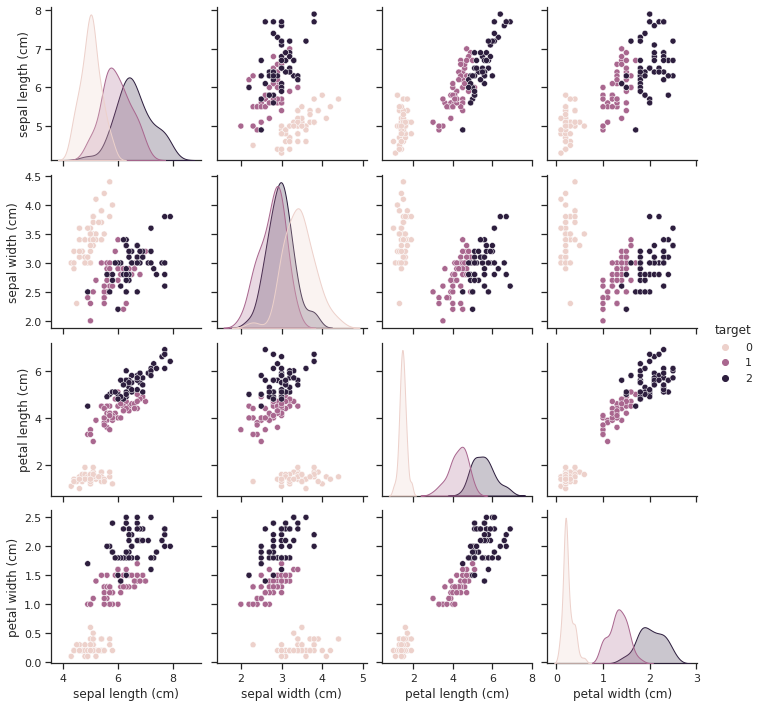

In [4]:
sns.set(style='ticks')
sns.pairplot(iris_df, hue='target')
plt.show()

### Separar o conjunto de dados em treinamento e testes

In [5]:
iris_df_X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
iris_df_Y = iris_df['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']],
    iris_df['target'],
    test_size=0.2,
    random_state=0
)

### Aplicar o KNN para treinar um modelo

Além disso, classificar os exemplos de testes

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

knn_Y_predicted = knn.predict(X_test)
knn_accuracy = np.sum(knn_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * knn_accuracy))

Acurácia: 96.67%


### Aplicar o SVM para treinar um modelo

... e classificar os exemplos de testes...

In [7]:
from sklearn import svm

svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train, Y_train)

svm_Y_predicted = svm.predict(X_test)
svm_accuracy = np.sum(svm_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * svm_accuracy))

Acurácia: 100.00%


#### Calcular a precisão e revogação...

In [8]:
from sklearn.metrics import precision_recall_fscore_support

print("KNN (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, knn_Y_predicted, average=None)

KNN (precisão, revogação, fscore)


(array([1.        , 1.        , 0.85714286]),
 array([1.        , 0.92307692, 1.        ]),
 array([1.        , 0.96      , 0.92307692]),
 array([11, 13,  6]))

In [9]:
print("SVM (precisão, revogação, fscore)")
precision_recall_fscore_support(Y_test, svm_Y_predicted, average=None)

SVM (precisão, revogação, fscore)


(array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([11, 13,  6]))

#### Calcular a Validação Cruzada...

In [10]:
from sklearn.model_selection import cross_val_score


scores_knn = cross_val_score(knn, iris_df_X, iris_df_Y, cv=5)
print('Acurácia KNN: {:.2f} (± {:.2f})'.format(scores_knn.mean(), scores_knn.std() * 2))

scores_svm = cross_val_score(svm, iris_df_X, iris_df_Y, cv=5)
print('Acurácia SVM: {:.2f} (± {:.2f})'.format(scores_svm.mean(), scores_svm.std() * 2))

Acurácia KNN: 0.97 (± 0.05)
Acurácia SVM: 0.98 (± 0.03)


----
# Atividades

Utilizar o conjunto de dados weatherHistory.csv, que contém o histórico de variáveis relacionadas ao clima da cidade de Szede, Hungria, entre 2006 e 2016.

Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo de precipitação (Precip Type) de acordo com outras variáveis. Teste pelo menos três algoritmos e responda:

## 1. Leia o arquivo `weatherHistory.csv`
Armazene-os nas variável `df`. 

Chame a função `q1.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q1.hint()`

In [11]:
# q1.hint()

df = pd.read_csv("/content/weatherHistory.csv")

q1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



## 2. Divida o conjunto de treinamento (70% das instâncias) e de teste (30% das instâncias)

Utilize uma amostragem aleatória (pesquise um parâmetro que realize isso).

Armazene os dados nas seguintes variáveis:
- `X_train` - Conjunto de atributos de entrada para treinamento
- `Y_train` - Conjunto de saída para treinamento
- `X_test` - Conjunto de atributos de entrada para teste
- `Y_test` - Conjunto de saída para teste

Chame a função `q2.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q2.hint()`

In [12]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [13]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

É notado um valor vazio "nan" na culuna Precip Type. Dessa forma, iremos remover esses valores para analisar os dados sem valores nulos e após isso tentar analisar os resultados com alguns modelos de previsão.

In [14]:
df = df.dropna(subset=['Precip Type'])
df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

Removido os valores nulos, podemos determinar agora os cunjuntos de treino e teste.

In [15]:
# q2.hint()

X_train, X_test, Y_train, Y_test = train_test_split(
    df[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']],
    df['Precip Type'],
    test_size=0.3,
    random_state=0
)

q2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



## 3. Faça uma análise simples da distribuição dos dados de Precipitação
Analise se os dados seguem uma distribuição normal ou não, se é contínuo ou não, etc. Talvez com 1 ou 2 gráficos você consiga tirar toda a informação necessária.

Tente extrair as informações fundamentais para **escolher um modelo de aprendizado de máquina supervisionado** ideal.

Essa questão não possui verificação automática mas você pode pedir dicas com `q3.hint()`

In [16]:
df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

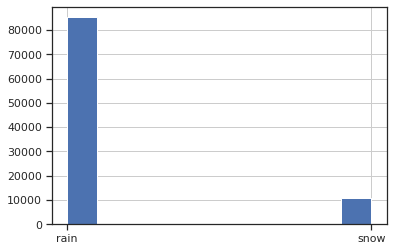

In [17]:
# Resposta da 3

valores = df['Precip Type'].hist()

# q3.hint(2)

Como podemos observar pelo gráfico, os dados são contínuos, isso se deve ao fato de que a precipitação é um atributo categórico. Assim, os valores pertencentes a esse atributo são geralmente relacionados a sua quantidade ou a sua frequência.

Chuva:  85224
Neve:  10712


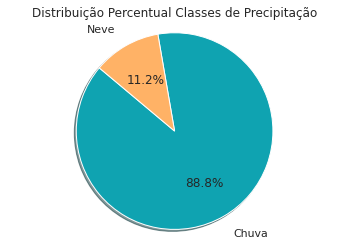

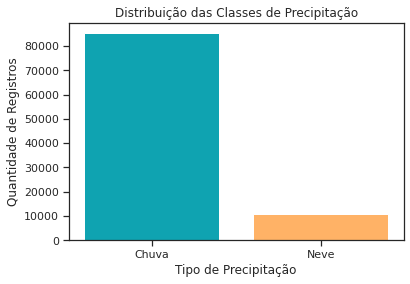

In [18]:
rain = df.value_counts(df['Precip Type']) [0]
snow = df.value_counts(df['Precip Type']) [1]

tam = len(df)

print('Chuva: ',rain)
print('Neve: ',snow)

pie = pd.DataFrame([['Chuva',rain],['Neve',snow]],columns=['Tipo' , 'Quantidade'])


def pie_chart(data,col1,col2,title): 
    labels = {'Chuva':0,'Neve':1}
    sizes = data[col2]
    colors = ['#0FA3B1', '#ffb266']

    plt.pie(sizes, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=140, labeldistance =1.2)
    plt.title( title )
    
    plt.axis('equal')
    plt.show()

pie_chart(pie,'Tipo' , 'Quantidade','Distribuição Percentual Classes de Precipitação')

plt.bar(pie.Tipo,pie.Quantidade, color = ['#0FA3B1', '#ffb266'])
plt.title("Distribuição das Classes de Precipitação")
plt.xlabel("Tipo de Precipitação")
plt.ylabel('Quantidade de Registros')
plt.show()

Como podemos perceber nas análises feitas anteriormente, os algoritmos de previsão supervisionado, como o KNN e o SVM seráo bons modelos para determinar os tipos de precipitação existentes, além disso, como são apenas duas classes, e a grande maioria se encontra em um tipo, os modelos terão poucas informações sobre quando deve ser Neve. 

## 4. Utilize técnicas de aprendizado de máquina **supervisionado** para prever o tipo de precipitação
Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo de precipitação (Precip Type) de acordo com outras variáveis. 

Analise o conjunto de dadoTeste pelo menos três algoritmos. Escolha os que você julgar mais adequado e justifique porque o escolheu (uma frase curta, não precisa se aprofundar... tente aplicar os conhecimentos teóricos sobre cada modelo)


É esperado que você preencha uma célula de markdown descrevendo o método e o porquê o escolheu, e uma célula de código que faça o treinamento (`fit`) do modelo.

Essa questão não possui verificação automática mas você pode pedir dicas com `q4.hint()`

### Resposta da 4: - Modelo 1

**Modelo:** Modelo de previsão KNN:

**Justificativa:** O algoritmo usa ‘ similaridade de recurso ‘ para prever valores de quaisquer novos pontos de dados. Isso significa que o novo ponto recebe um valor baseado em quão próximo ele se parece dos pontos no conjunto de treinamento. Dessa forma, como estamos tentando prever se o tipo de precipitação vai ser de chuva ou de neve, ou seja, valores categóricos o algoritmo KNN pode conter resultados significativos.

In [19]:
# Resposta da 4: - Modelo 1
# Faça o modelo do primeiro modelo da 4. aqui!

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

knn_Y_predicted = knn.predict(X_test)
knn_accuracy = np.sum(knn_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * knn_accuracy))
# q4.hint()

Acurácia: 98.83%


### Resposta da 4: - Modelo 2

**Modelo:** Modelo de previsão SVM:

**Justificativa:** O modelo de previsão SVM tenta encontrar um hiperplano que melhor diferencia as duas classes. Dessa forma, como temos os tipos "Chuva" e "Neve", o modelo SVM tende a ser um bom classificador.

In [88]:
# Resposta da 4: - Modelo 2
# Faça o modelo do segundo modelo da 4. aqui!

from sklearn import svm

SVM = svm.SVC(kernel='linear', probability=True)
SVM.fit(X_train, Y_train)

SVM_Y_predicted = SVM.predict(X_test)
SVM_accuracy = np.sum(SVM_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * SVM_accuracy))

Acurácia: 99.86%


### Resposta da 4: - Modelo 3

**Modelo:** Modelo de previsão Arvore de decisão:

**Justificativa:** Árvore de decisão é um tipo de algoritmo de aprendizagem supervisionada utilizada em problemas de classificação. Com o cálculo do índice GINI (por default no modelo), assim como na Entropia, será verificada a distribuição dos dados nas variáveis preditoras de acordo com a variação da variável target.A variável preditora com o menor índice Gini será a escolhida para o nó principal da árvore, pois um baixo valor do índice indica maior ordem na distribuição dos dados. Como temos os tipos "Chuva" e "Neve", o modelo arvore de decisão tende a ser um bom classificador.

In [21]:
# Resposta da 4: - Modelo 3
# Faça o modelo do terceiro modelo da 4. aqui!

from sklearn import tree
dtc=tree.DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

tree_Y_predicted = dtc.predict(X_test)
tree_accuracy = np.sum(tree_Y_predicted == Y_test) / len(Y_test)

print('Acurácia: {:.2f}%'.format(100 * tree_accuracy))

Acurácia: 100.00%


## 5. Calcule estatísticas para cada algoritmo escolhido
Calcule a acurácia, precisão e revocação para cada rótulo (tipo de precipitação) para cada algoritmo testado.

É esperado que você preencha a tabela markdown abaixo com os resultados.

Essa questão não possui verificação automática mas você pode pedir dicas com `q5.hint()`

In [23]:
def VP(Y_test,Predicted,tipo):
  valor = 0
  conjuntoP = Predicted
  conjuntoR = Y_test.values
  for i in range(len(conjuntoP)):
    if conjuntoP[i] == tipo and conjuntoR[i] == tipo:
      valor += 1
  return valor

In [24]:
def VN(Y_test,Predicted,tipo):
  valor = 0
  conjuntoP = Predicted
  conjuntoR = Y_test.values
  for i in range(len(conjuntoP)):
    if conjuntoP[i] != tipo and conjuntoR[i] != tipo:
      valor += 1
  return valor

In [25]:
def FN(Y_test,Predicted,tipo):
  valor = 0
  conjuntoP = Predicted
  conjuntoR = Y_test.values
  for i in range(len(conjuntoP)):
    if conjuntoP[i] != tipo and conjuntoR[i] == tipo:
      valor += 1
  return valor

In [26]:
def FP(Y_test,Predicted,tipo):
  valor = 0
  conjuntoP = Predicted
  conjuntoR = Y_test.values
  for i in range(len(conjuntoP)):
    if conjuntoP[i] == tipo and conjuntoR[i] != tipo:
      valor += 1
  return valor

In [27]:
def acuracia(predicted,modelo,tipo,X_test,Y_test):
  return (VP(Y_test,predicted,tipo) + VN(Y_test,predicted,tipo))/(VP(Y_test,predicted,tipo) + VN(Y_test,predicted,tipo) + FP(Y_test,predicted,tipo) + FN(Y_test,predicted,tipo))

In [28]:
def precisao(predicted,modelo,tipo,X_test,Y_test):
  return VP(Y_test,predicted,tipo) / (VP(Y_test,predicted,tipo) + FP(Y_test,predicted,tipo))

In [29]:
def revocacao(predicted,modelo,tipo,X_test,Y_test):
  return VP(Y_test,predicted,tipo) / ( VP(Y_test,predicted,tipo) + FN(Y_test,predicted,tipo) )

In [30]:
def estatisticas(modelo,tipo,X_test,Y_test):
  predicted = modelo.predict(X_test)
  print(f"Para o tipo {tipo}, temos:") 
  print(f"Acuracia = {acuracia(predicted,modelo,tipo,X_test,Y_test)}")
  print(f"Precisao = {precisao(predicted,modelo,tipo,X_test,Y_test)}")
  print(f"Revocacao = {revocacao(predicted,modelo,tipo,X_test,Y_test)}")
  print(50*"=")

### Algoritmo 1

**Nome:** KNN

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
|          Rain          	|  0.98829  |  0.99353  |   0.99326   |
|          Snow         	|  0.98829  |  0.94722 	|   0.94926   |

In [31]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 1. 
#Algoritmo 1 KNN
estatisticas(knn,"snow",X_test,Y_test)
estatisticas(knn,"rain",X_test,Y_test)
# q5.hint()

Para o tipo snow, temos:
Acuracia = 0.9882908863486328
Precisao = 0.9472230745627493
Revocacao = 0.9492619926199262
Para o tipo rain, temos:
Acuracia = 0.9882908863486328
Precisao = 0.9935349894208918
Revocacao = 0.9932625641427396


### Algoritmo 2

**Nome:** Modelo de previsão SVM

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
|          Rain	          |  0.99861  |    1.0    |   0.99843   |
|          Snow 	        |  0.99861  |  0.98784  |   1.0     	|

In [32]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 2. 

estatisticas(SVM,"snow",X_test,Y_test)
estatisticas(SVM,"rain",X_test,Y_test)

# q5.hint()

Para o tipo snow, temos:
Acuracia = 0.998610194225357
Precisao = 0.9878493317132442
Revocacao = 1.0
Para o tipo rain, temos:
Acuracia = 0.998610194225357
Precisao = 1.0
Revocacao = 0.9984331544517999


### Algoritmo 3

**Nome:** Modelo de previsão Arvore de decisão:

**Resultados:**

| Label                  	| Acurácia 	| Precisão 	| Revogação 	|
|------------------------	|----------	|----------	|-----------	|
|          Rain	          |    1.0    |    1.0    |     1.0     |
|          Snow 	        |    1.0    |    1.0    |     1.0     |

In [33]:
# Insira o código para calcular estatísticas do seu modelo/algoritmo 3. 
estatisticas(dtc,"snow",X_test,Y_test)
estatisticas(dtc,"rain",X_test,Y_test)
# q5.hint()

Para o tipo snow, temos:
Acuracia = 1.0
Precisao = 1.0
Revocacao = 1.0
Para o tipo rain, temos:
Acuracia = 1.0
Precisao = 1.0
Revocacao = 1.0


## 6.  É possível melhorar o algoritmo se forem selecionados alguns atributos em particular, ao invés de utilizar todos?
Descreva sua resposta para cada um dos algoritmos. Utilize evidências empíricas, se achar conveniente.

Essa questão não possui verificação automática mas você pode pedir dicas com `q6.hint()`

In [68]:
# Colunas X = df[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']]
# Coluna Y = df['Precip Type'],


# Ordem == X_train, X_test, Y_train, Y_test 
def splitar(valoresX,valoresY):
  return train_test_split(
      valoresX,
      valoresY,
      test_size=0.3,
      random_state=0
  )

In [67]:
from sklearn.neighbors import KNeighborsClassifier

def modeloKNN(X_train, X_test, Y_train, Y_test):
  knn = KNeighborsClassifier()
  knn.fit(X_train, Y_train)

  knn_Y_predicted = knn.predict(X_test)
  knn_accuracy = np.sum(knn_Y_predicted == Y_test) / len(Y_test)

  print('Acurácia: {:.2f}%'.format(100 * knn_accuracy))
  return knn

In [86]:
X_train, X_test, Y_train, Y_test = splitar(df[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']],df['Precip Type'])
knn = modeloKNN(X_train, X_test, Y_train, Y_test )

Acurácia: 98.83%


Como podemos observar, utilizando como valores a determinarem o tipo de precipitação as colunas: 

- 'Temperature (C)' , 'Humidity' , 'Wind Speed (km/h)' , 'Visibility (km)' ,'Pressure (millibars)'

O modelo obteve uma acurácia de 98.83%

In [71]:
# Removendo as colunas 'Wind Speed (km/h)' 'Visibility (km)' 'Pressure (millibars)'
X_train, X_test, Y_train, Y_test = splitar(df[['Temperature (C)','Humidity']],df['Precip Type'])
novoKnn = modeloKNN(X_train, X_test, Y_train, Y_test )

Acurácia: 99.97%


Como podemos observar, ao remover as colunas 'Wind Speed (km/h)' 'Visibility (km)' 'Pressure (millibars)' do modelo para prever o tipo de precipitação, a acurácia do modelo ficou maior

In [72]:
# Testando outros atributos do novo modelo
colunas = ["rain","snow"]
for coluna in colunas:
  estatisticas(novoKnn,coluna,X_test,Y_test)

Para o tipo rain, temos:
Acuracia = 0.9996525485563392
Precisao = 1.0
Revocacao = 0.9996082886129499
Para o tipo snow, temos:
Acuracia = 0.9996525485563392
Precisao = 0.996934396076027
Revocacao = 1.0


Não só a acurácia ficou maior, como também a precisão e a revocação do modelo aumentaram, apesar de que não foi um aumento tão grande se comparado com os resultados anteriores. Dessa forma, ao retirar alguns atributos, podemos sim melhorar o modelo de previsão como pode ser visto no modelo KNN

In [73]:
# q6.hint(3)
updated_models = novoKnn

## 7. Você percebeu alguma diferença no tempo de processamento dos algoritmos? Qual foi o mais lento? E qual foi o mais rápido?
Descreva sua resposta para cada um dos algoritmos. Utilize evidências empíricas, se achar conveniente.

Essa questão não possui verificação automática mas você pode pedir dicas com `q7.hint()`

In [82]:
import time
from sklearn import svm
from sklearn import tree
def benchKnn():
  start = time.time()
  knn = KNeighborsClassifier()
  knn.fit(X_train, Y_train)
  end = time.time()
  print(f"Tempo decorrido KNN = {end - start} segundos")

def benchSvm():
  start = time.time()
  SVM = svm.SVC(kernel='linear', probability=True)
  SVM.fit(X_train, Y_train)
  end = time.time()
  print(f"Tempo decorrido SVM = {end - start} segundos")

def benchTree():
  start = time.time()
  dtc=tree.DecisionTreeClassifier()
  dtc.fit(X_train,Y_train)
  end = time.time()
  print(f"Tempo decorrido Arvore = {end - start} segundos")

In [84]:
# q7.hint()
benchKnn()
benchSvm()
benchTree()

Tempo decorrido KNN = 0.7692935466766357 segundos
Tempo decorrido SVM = 15.160179615020752 segundos
Tempo decorrido Arvore = 0.12665271759033203 segundos


Houve diferenças no tempo de processamento de cada algoritmo, sendo o algoritmo de arvore de decisão o mais rápido com 0.126 segundos e o SVM o mais lento com 15.16 segundos de tempo de treinamento. 

Dessa forma, o modelo de árvore de decisão se saiu melhor, visto que uma árvore de decisão é um mapa dos possíveis resultados de uma série de escolhas relacionadas. Permite que um indivíduo ou organização compare possíveis ações com base em seus custos, probabilidades e benefícios. Podem pode ser usadas tanto para conduzir diálogos informais quanto para mapear um algoritmo que prevê a melhor escolha, matematicamente.

Já o modelo de SVM teve um desempenho muito inferior aos demais, visto que a velocidade de treinamento varia com os valores dos hiperparâmetros na hora de treinar o modelo.

## 8. Mostre a matriz de confusão para os resultados.
Pesquise como fazer uma matriz de confusão. Descreva sua resposta para cada um dos algoritmos. Evidencie explicitamente o código utilizado, usando bibliotecas ou não.

Essa questão não possui verificação automática mas você pode pedir dicas com `q8.hint()`

In [89]:
# q8.hint()
from sklearn.metrics import confusion_matrix

confusion_matrixKNN = confusion_matrix(Y_test, knn.predict(X_test))
confusion_matrixSVM = confusion_matrix(Y_test, SVM.predict(X_test))
confusion_matrixTree = confusion_matrix(Y_test, dtc.predict(X_test))

print("KNN")
print(confusion_matrixKNN)
print("SVM")
print(confusion_matrixSVM)
print("ARVORE")
print(confusion_matrixTree)


KNN
[[25357   172]
 [  165  3087]]
SVM
[[25489    40]
 [    0  3252]]
ARVORE
[[25529     0]
 [    0  3252]]


Para o modelo KNN, foi possivel obter:

- VP = 25357
- VN = 3087
- FP = 165
- FN = 172

Para o modelo SVM, foi possivel obter:

- VP = 25489
- VN = 3252
- FP = 0
- FN = 40

Para o modelo Arvore de decisão , foi possivel obter:

- VP = 25529
- VN = 3252
- FP = 0
- FN = 0